# Spotify Recommender System



The dataset our group is using is a csv file that contains the top most streamed Spotify songs each year from 2010 all the way to 2019. We pulled this dataset from kaggle.com, and it contains a lot of properties of the music that we would like to play around with. Along with each song, the dataset contains the artist, release date, genre, beats per minute, energy rating, danceability rating (the higher the value the easier it is to dance to), loudness, and liveness (a higher value means the song is more likely a recording). We hope that we can experiment with and fine tune each of these parameters in order to make a quality recommendation system. We then plan on creating our own datasets that simulate the “user”. 


We were able to use the groupby function to group together the corresponding beats per minute, danceability, and energy of each genre. We then plotted these values to compare different values for different categories as well as compute means to try and find patterns.

We began the process of creating a recommender system by taking a varied sample of songs from the dataset and creating a preference matrix using ratings of each category. We then performed analysis on the perference matrix to figure out which categories were most important.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [7]:
df = pd.read_csv("top10s.csv", encoding = 'unicode_escape') #We used this in Homework 5; helps fix "UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 8: invalid start byte"

del df['Unnamed: 0']

df

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [4]:
# set(df['top genre'])

# df2 = df[['top genre','bpm']]

# groups = df2.groupby(df2['top genre'])

# groups.head()

baskets = df.groupby('top genre')['nrgy'].apply(list).reset_index(name='nrgy')

arr = []
for index, row in baskets.iterrows():
    arr.append(len(row['nrgy']))

baskets['num'] = arr


baskets.sort_values(by = ['num'], inplace=True, ascending = False)

baskets.head()


,top genre,nrgy,num
25,dance pop,"[84, 92, 78, 76, 87, 82, 83, 84, 61, 81, 80, 6...",327
48,pop,"[84, 83, 81, 84, 76, 56, 83, 70, 75, 47, 68, 8...",60
18,canadian pop,"[86, 93, 58, 84, 55, 96, 52, 38, 76, 57, 75, 8...",34
12,boy band,"[79, 85, 66, 88, 93, 82, 94, 98, 95, 52, 82, 7...",15
8,barbadian pop,"[72, 75, 79, 77, 91, 81, 85, 71, 72, 74, 27, 7...",15


In [5]:
baskets1 = df.groupby('top genre')['bpm'].apply(list).reset_index(name='bpm')

arr1 = []
for index, row in baskets1.iterrows():
    arr1.append(len(row['bpm']))

baskets1['num'] = arr1


baskets1.sort_values(by = ['num'], inplace=True, ascending = False)

baskets1.head()

,top genre,bpm,num
25,dance pop,"[120, 119, 120, 148, 128, 130, 122, 125, 121, ...",327
48,pop,"[109, 145, 103, 109, 128, 110, 145, 144, 110, ...",60
18,canadian pop,"[65, 150, 120, 128, 97, 184, 105, 100, 100, 12...",34
12,boy band,"[125, 127, 121, 118, 90, 126, 104, 148, 160, 1...",15
8,barbadian pop,"[126, 182, 100, 128, 80, 128, 128, 92, 127, 13...",15


In [6]:
baskets2 = df.groupby('top genre')['dnce'].apply(list).reset_index(name='dnce')

arr2 = []
for index, row in baskets2.iterrows():
    arr2.append(len(row['dnce']))

baskets2['num'] = arr2


baskets2.sort_values(by = ['num'], inplace=True, ascending = False)

baskets2.head()

,top genre,dnce,num
25,dance pop,"[76, 70, 75, 52, 62, 77, 83, 44, 72, 82, 63, 8...",327
48,pop,"[64, 62, 70, 64, 72, 71, 62, 73, 74, 62, 63, 7...",60
18,canadian pop,"[73, 58, 78, 60, 72, 47, 56, 61, 65, 85, 75, 5...",34
12,boy band,"[73, 72, 60, 65, 63, 56, 55, 68, 49, 67, 65, 4...",15
8,barbadian pop,"[79, 31, 69, 73, 58, 82, 72, 56, 70, 53, 58, 3...",15


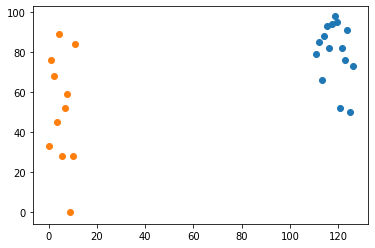

In [7]:
y = baskets.loc[baskets['top genre'] == 'british soul']['nrgy']

yNew = []
for i in y:
    yNew.append(i)

yNew = yNew[0]

x = np.linspace(0, len(yNew), len(yNew))

##################################################################################################################################

z = baskets.loc[baskets['top genre'] == 'boy band']['nrgy']

zNew = []
for i in z:
    zNew.append(i)

zNew = zNew[0]

x2 = np.linspace(100 + len(yNew), 100 + len(yNew) + len(zNew), len(zNew))

# print(x)

plt.scatter(x2, zNew)
plt.scatter(x, yNew)
plt.show()

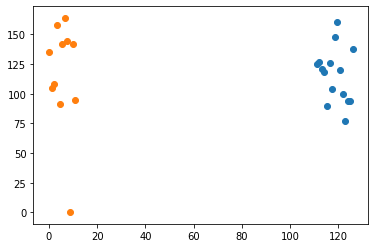

In [8]:
y = baskets1.loc[baskets1['top genre'] == 'british soul']['bpm']

yNew = []
for i in y:
    yNew.append(i)

yNew = yNew[0]

x = np.linspace(0, len(yNew), len(yNew))

##################################################################################################################################

z = baskets1.loc[baskets1['top genre'] == 'boy band']['bpm']

zNew = []
for i in z:
    zNew.append(i)

zNew = zNew[0]

x2 = np.linspace(100 + len(yNew), 100 + len(yNew) + len(zNew), len(zNew))

# print(x)

plt.scatter(x2, zNew)
plt.scatter(x, yNew)
plt.show()

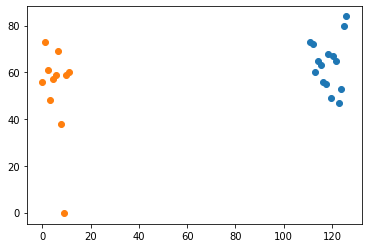

In [9]:
y = baskets2.loc[baskets2['top genre'] == 'british soul']['dnce']

yNew = []
for i in y:
    yNew.append(i)

yNew = yNew[0]

x = np.linspace(0, len(yNew), len(yNew))

##################################################################################################################################

z = baskets2.loc[baskets2['top genre'] == 'boy band']['dnce']

zNew = []
for i in z:
    zNew.append(i)

zNew = zNew[0]

x2 = np.linspace(100 + len(yNew), 100 + len(yNew) + len(zNew), len(zNew))

# print(x)

plt.scatter(x2, zNew)
plt.scatter(x, yNew)
plt.show()

In our plots when comparing the genres of "british soul" and "boy band", we can see that the categories of danceability and energy varied more for British Soul, while they had similar distributions for beats per minute. In testing our sample rating against a weak version of the reccomender system model, we found that high energy was favored more than the genre and danceability for this arbitrary user. From here we plan on advancing our model by using a larger and more generalizable sample, comparing against more features, and reccomending new songs based on the analysis of those features.

In [10]:
dance_means = df.groupby('top genre')['dnce'].mean().reset_index(name='danceability means')

dance_means.head()

,top genre,danceability means
0,acoustic pop,42.500
1,alaska indie,51.000
2,alternative r&b,90.000
3,art pop,52.375
4,atl hip hop,59.800


In [11]:
bpm_means = df.groupby('top genre')['bpm'].mean().reset_index(name='bpm means')

bpm_means.head()

,top genre,bpm means
0,acoustic pop,155.000
1,alaska indie,132.000
2,alternative r&b,136.000
3,art pop,115.125
4,atl hip hop,102.800


In [12]:
energy_means = df.groupby('top genre')['nrgy'].mean().reset_index(name='energy means')

energy_means.head()

,top genre,energy means
0,acoustic pop,61.000
1,alaska indie,34.000
2,alternative r&b,40.000
3,art pop,60.125
4,atl hip hop,82.200


In [13]:
# dfR = df.loc[df["title"] == "Applause"]
dfR = df.loc[df["title"] == "TiK ToK"]
dfM = df.loc[df["title"] == "Applause"]
dfV = df.loc[df["title"] == "Shape of You"]
dfS = df.loc[df["title"] == "Girls Like You (feat. Cardi B)"]
dfH = df.loc[df["title"] == "The Hills"]
dff = [dfR, dfM, dfS, dfV, dfH]

dfg = pd.concat(dff)
dfg.drop(dfg.tail(1).index,inplace=True)
dfg
result = dfg[["title", "artist", "top genre", "nrgy", "dnce"]]
result



,title,artist,top genre,nrgy,dnce
2,TiK ToK,Kesha,dance pop,84,76
195,Applause,Lady Gaga,dance pop,78,67
592,Girls Like You (feat. Cardi B),Maroon 5,pop,54,85
443,Shape of You,Ed Sheeran,pop,65,83
270,The Hills,The Weeknd,canadian contemporary r&b,56,58


In [45]:
bpm_min = df.groupby('top genre')['bpm'].min().reset_index(name='bpm min')
bpm_max = df.groupby('top genre')['bpm'].max().reset_index(name='bpm max')

# for index, row in bpm_min.iterrows():

max_value = bpm_max['bpm max'].max()
print("low bpm, medium bpm, high bpm")

titles = ["TiK ToK", "Applause", "Shape of You", "Girls Like You (feat. Cardi B)", "The Hills"]
ratings = [7, 9, 3, 2, 5]

bpm_pref = np.zeros((len(titles), 3))
for i in range(len(titles)):
    beats = df.loc[df["title"] == titles[i]]['bpm'].values[0]    
    if beats >= 0 and beats < 100:
        bpm_pref[i][0] = ratings[i]
    elif beats >= 100 and beats < 140:
        bpm_pref[i][1] = ratings[i]
    elif beats >= 140 and beats < 207:
        bpm_pref[i][2] = ratings[i]
        
print(bpm_pref)

low bpm, medium bpm, high bpm
[[0. 7. 0.]
 [0. 0. 9.]
 [3. 0. 0.]
 [0. 2. 0.]
 [0. 5. 0.]]


In [46]:
dfB = pd.DataFrame(bpm_pref)
print(dfB)

     0    1    2
0  0.0  7.0  0.0
1  0.0  0.0  9.0
2  3.0  0.0  0.0
3  0.0  2.0  0.0
4  0.0  5.0  0.0


In [47]:
np.not_equal(dfB,0)

,0,1,2
0,False,True,False
1,False,False,True
2,True,False,False
3,False,True,False
4,False,True,False


In [62]:
dfB_norm = dfB.copy()
avg = np.sum(dfB.replace(0, np.nan).sum())/np.sum(dfB.replace(0, np.nan).count())
dfB_norm = dfB_norm.apply(lambda row : row.loc[row != 0] - avg)
dfB_norm = dfB_norm.replace(np.nan, 0) # put the 0s back
print(dfB_norm)

     0    1    2
0  0.0  1.8  0.0
1  0.0  0.0  3.8
2 -2.2  0.0  0.0
3  0.0 -3.2  0.0
4  0.0 -0.2  0.0


In [63]:
Bpreferences = np.array([dfB_norm.loc[dfB_norm.iloc[:,feat] != 0, feat].mean() for feat in range(3)])
print(Bpreferences)

[-2.2        -0.53333333  3.8       ]


These samples ratings indicate that the user prefers high bpm and dislikes low bpm.
nrgy, dance, dur

In [58]:
dance_min = df.groupby('top genre')['dnce'].min().reset_index(name='dance min')
dance_max = df.groupby('top genre')['dnce'].max().reset_index(name='dance max')

max_value = dance_max['dance max'].max()
min_value = dance_min['dance min'].min()

titles = ["TiK ToK", "Applause", "Shape of You", "Girls Like You (feat. Cardi B)", "The Hills"]
ratings = [7, 9, 3, 2, 5]

dance_pref = np.zeros((len(titles), 3))
for i in range(len(titles)):
    dances = df.loc[df["title"] == titles[i]]['dnce'].values[0]    
    if dances >= 0 and dances < 61:
        dance_pref[i][0] = ratings[i]
    elif dances >= 62 and dances < 78:
        dance_pref[i][1] = ratings[i]
    elif dances >= 79 and dances < 98:
        dance_pref[i][2] = ratings[i]
        
print(dance_pref)

[[0. 7. 0.]
 [0. 9. 0.]
 [0. 0. 3.]
 [0. 0. 2.]
 [5. 0. 0.]]


In [59]:
dfD = pd.DataFrame(dance_pref)
print(dfD)

     0    1    2
0  0.0  7.0  0.0
1  0.0  9.0  0.0
2  0.0  0.0  3.0
3  0.0  0.0  2.0
4  5.0  0.0  0.0


In [61]:
np.not_equal(dfD,0)

,0,1,2
0,False,True,False
1,False,True,False
2,False,False,True
3,False,False,True
4,True,False,False


In [64]:
dfD_norm = dfD.copy()
avg = np.sum(dfD.replace(0, np.nan).sum())/np.sum(dfD.replace(0, np.nan).count())
dfD_norm = dfD_norm.apply(lambda row : row.loc[row != 0] - avg)
dfD_norm = dfD_norm.replace(np.nan, 0) # put the 0s back
print(dfD_norm)

     0    1    2
0  0.0  1.8  0.0
1  0.0  3.8  0.0
2  0.0  0.0 -2.2
3  0.0  0.0 -3.2
4 -0.2  0.0  0.0


In [65]:
Dpreferences = np.array([dfD_norm.loc[dfD_norm.iloc[:,feat] != 0, feat].mean() for feat in range(3)])
print(Dpreferences)

[-0.2  2.8 -2.7]


Favor medium, dislike high, indifferent low

In [73]:
energy_min = df.groupby('top genre')['nrgy'].min().reset_index(name='nrgy min')
energy_max = df.groupby('top genre')['nrgy'].max().reset_index(name='nrgy max')

max_value = energy_max['nrgy max'].max()
min_value = energy_min['nrgy min'].min()

titles = ["TiK ToK", "Applause", "Shape of You", "Girls Like You (feat. Cardi B)", "The Hills"]
ratings = [7, 9, 3, 2, 5]

energy_pref = np.zeros((len(titles), 3))
for i in range(len(titles)):
    energies = df.loc[df["title"] == titles[i]]['nrgy'].values[0]    
    if energies >= 0 and energies < 61:
        energy_pref[i][0] = ratings[i]
    elif energies >= 62 and energies < 82:
        energy_pref[i][1] = ratings[i]
    elif energies >= 83 and energies < 99:
        energy_pref[i][2] = ratings[i]
        
print(energy_pref)

[[0. 0. 7.]
 [0. 9. 0.]
 [0. 3. 0.]
 [2. 0. 0.]
 [5. 0. 0.]]


In [74]:
dfE = pd.DataFrame(energy_pref)
print(dfE)

     0    1    2
0  0.0  0.0  7.0
1  0.0  9.0  0.0
2  0.0  3.0  0.0
3  2.0  0.0  0.0
4  5.0  0.0  0.0


In [75]:
np.not_equal(dfE,0)

,0,1,2
0,False,False,True
1,False,True,False
2,False,True,False
3,True,False,False
4,True,False,False


In [76]:
dfE_norm = dfE.copy()
avg = np.sum(dfE.replace(0, np.nan).sum())/np.sum(dfE.replace(0, np.nan).count())
dfE_norm = dfE_norm.apply(lambda row : row.loc[row != 0] - avg)
dfE_norm = dfE_norm.replace(np.nan, 0) # put the 0s back
print(dfE_norm)

     0    1    2
0  0.0  0.0  1.8
1  0.0  3.8  0.0
2  0.0 -2.2  0.0
3 -3.2  0.0  0.0
4 -0.2  0.0  0.0


In [77]:
Epreferences = np.array([dfE_norm.loc[dfE_norm.iloc[:,feat] != 0, feat].mean() for feat in range(3)])
print(Epreferences)

[-1.7  0.8  1.8]


Dislikes low energy, likes high energy

In [97]:
def mag(x):
    return np.sqrt(np.sum(x**2))

def cosine_sim(x,y):
    return np.sum(x*y)/(mag(x)*mag(y))

#feature - bpm
# Party Rock Anthem - LMFAO
# Slow Hands - Nail Whore
# Hello - Adele
song1 = ("Party Rock Anthem", "LMFAO")
song2 = ("Slow Hands", "Niall Horan")
song3 = ("Hello", "Adele")
songs = [song1, song2, song3]
a = np.zeros((len(songs), 3))
b = np.zeros((len(songs), 3))
c = np.zeros((len(songs), 3))
for i in range(len(songs)):
    d = df.loc[df["title"] == songs[i][0]]
    bpmRec = d.loc[d["artist"] == songs[i][1]]['bpm'].values[0]
    danceRec = d.loc[d["artist"] == songs[i][1]]['dnce'].values[0]
    energyRec = d.loc[d["artist"] == songs[i][1]]['nrgy'].values[0]
    if bpmRec >= 0 and bpmRec < 100:
        a[i][0] = 1
    elif bpmRec >= 100 and bpmRec < 140:
        a[i][1] = 1
    elif bpmRec >= 140 and bpmRec < 207:
        a[i][2] = 1
    if danceRec >= 0 and danceRec < 61:
        b[i][0] = 1
    elif danceRec >= 62 and danceRec < 78:
        b[i][1] = 1
    elif danceRec >= 79 and danceRec < 98:
        b[i][2] = 1
    if energyRec >= 0 and energyRec < 61:
        c[i][0] = 1
    elif energyRec >= 62 and energyRec < 82:
        c[i][1] = 1
    elif energyRec >= 83 and energyRec < 99:
        c[i][2] = 1
    sim_P_A = cosine_sim(Bpreferences, a[i])
    sim_P_B = cosine_sim(Dpreferences, b[i])
    sim_P_C = cosine_sim(Epreferences, c[i])
    
    print(songs[i],sim_P_A + sim_P_B + sim_P_C)

('Party Rock Anthem', 'LMFAO') 0.9057824721082777
('Slow Hands', 'Niall Horan') -0.4318491337021222
('Hello', 'Adele') 0.1543994091622769


In [6]:
pca = PCA(2).fit_transform(df)
pcaWithVar = PCA(2).fit_transform(dfVar)
genres = dfGenre.to_numpy()

fig, ax = plt.subplots(1,1, figsize=(15,15))
dfPca = pd.DataFrame(pca, columns = ['PCA 1', 'PCA 2'])
dfPca['Clusters'] = genres
sns.scatterplot(data = dfPca, x = 'PCA 1', y = 'PCA 2', hue = 'Clusters', palette = 'colorblind', s = 75).set_title("PCA Analysis")

ValueError: could not convert string to float: 'Hey, Soul Sister'